In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC

In [79]:
df = pd.read_csv('../df.csv')

X = df.drop(columns=['Unnamed: 0','tag'], axis=1)
y = df['tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [18]:
X_train.head()
X_test.head()

runtimeMinutes  actor_minAccumulatedRating  actor_maxAccumulatedRating  \
740          0.371429                    0.313131                    0.439394   
25914        0.476190                    0.694121                    0.717172   
29777        0.295238                    0.737374                    0.737374   
597          0.428571                    0.292929                    0.292929   
26237        0.461905                    0.636364                    0.666667   

       actor_meanAccumulatedRating  actor_varAccumulatedRating  \
740                       0.376263                    0.003986   
25914                     0.704297                    0.000092   
29777                     0.737374                    0.000000   
597                       0.292929                    0.000000   
26237                     0.651515                    0.000230   

       actress_minAccumulatedRating  actress_maxAccumulatedRating  \
740                        0.313131                      0.313131   
25914                      0.700758                      0.700758   
29777                      0.737374                      0.737374   
597                        0.292929                      0.292929   
26237                      0.666667                      0.687879   

       actress_meanAccumulatedRating  actress_varAccumulatedRating  \
740                         0.313131                      0.000000   
25914                       0.700758                      0.000000   
29777                       0.737374                      0.000000   
597                         0.292929                      0.000000   
26237                       0.677273                      0.000112   

       director_minAccumulatedRating    ...      g_Musical  g_Mystery  g_News  \
740                         0.313131    ...              0          1       0   
25914                       0.739453    ...              0          0       0   
29777                       0.956158    ...              0          0       0   
597                         0.292929    ...              0          0       0   
26237                       0.673160    ...              0          0       0   

       g_Romance  g_Sci-Fi  g_Sport  g_Talk-Show  g_Thriller  g_War  g_Western  
740            0         0        0            0           1      0          0  
25914          0         0        0            0           0      0          0  
29777          0         0        0            0           0      0          0  
597            1         0        1            0           0      0          0  
26237          0         0        0            0           0      0          0  

[5 rows x 46 columns]

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import itertools
from sklearn.metrics import confusion_matrix

models_metrics = []
def get_accuracy(pred, values, text='', is_train=True, model_name='unnamed'):
    accuracy, precision, recall, f1 = get_metrics(values, pred)
    text = "model = %s, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (model_name, accuracy, precision, recall, f1)
    if is_train: 
        print(10*'='+' TRAIN '+10*'=')
    else:
        print(10*'='+' TEST '+10*'=')  
        models_metrics.append(text)
    print(text)  
    print()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    
    cm = confusion_matrix(y_test, y_predicted)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['0 star','1 star','2 stars','3 stars','4 stars','5 stars'], normalize=False, title='Confusion matrix')
    plt.show()
    print(cm)
    
    return accuracy, precision, recall, f1

def evaluate_model(model, X_train, y_train, X_test, y_test, fit=False, model_name='unnamed'):
    if fit:
        model.fit(X_train, y_train)
    
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    accuracy, precision, recall, f1 = get_metrics(y_train, y_train_predicted)
    print("="*10 + " TRAIN " + "="*10)
    print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (accuracy, precision, recall, f1))
    
    accuracy, precision, recall, f1 = get_metrics(y_test, y_test_predicted)
    text = "model = %s, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (model_name, accuracy, precision, recall, f1)
    models_metrics.append(text)
    print("="*10 + " TEST " + "="*10)
    print(text)
    
    return y_train_predicted, y_test_predicted, model


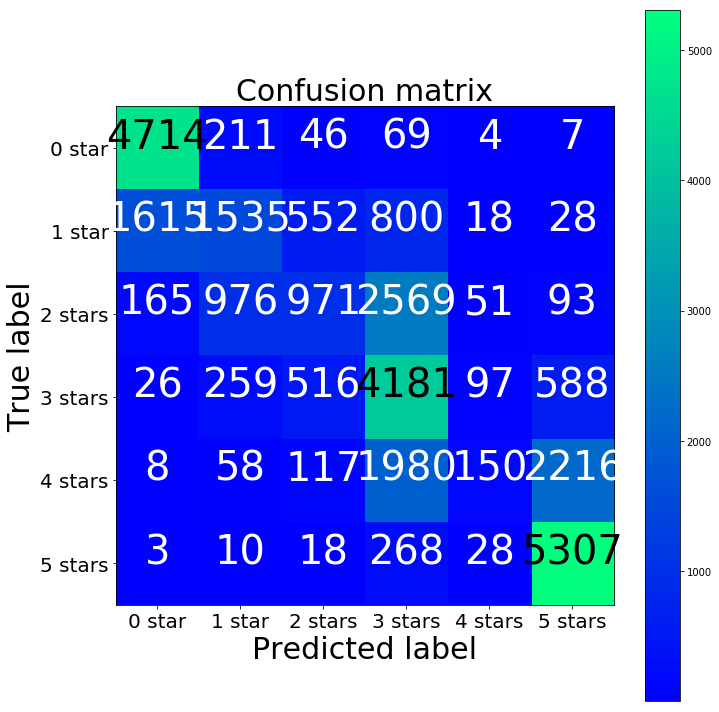

[[4714  211   46   69    4    7]
 [1615 1535  552  800   18   28]
 [ 165  976  971 2569   51   93]
 [  26  259  516 4181   97  588]
 [   8   58  117 1980  150 2216]
 [   3   10   18  268   28 5307]]
========== TRAIN ==========
accuracy = 0.557, precision = 0.530, recall = 0.557, f1 = 0.493 



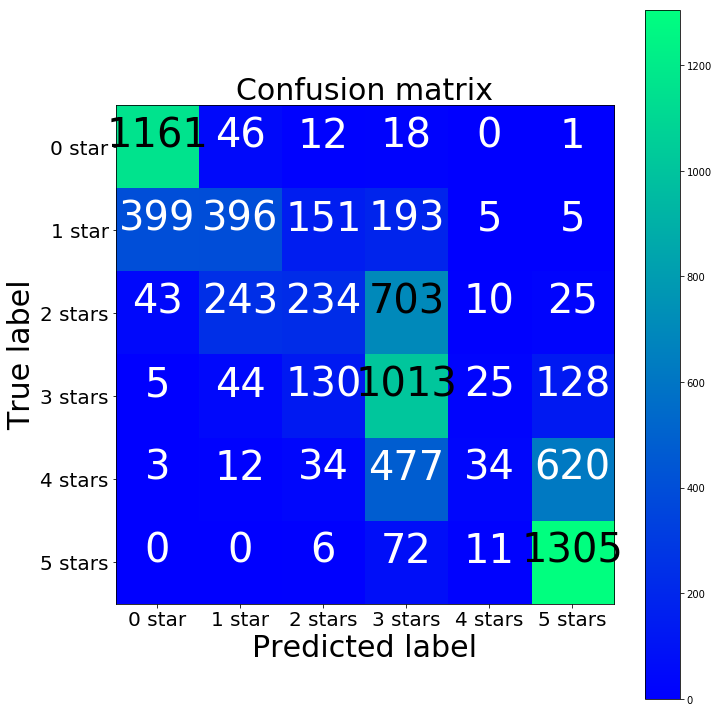

[[1161   46   12   18    0    1]
 [ 399  396  151  193    5    5]
 [  43  243  234  703   10   25]
 [   5   44  130 1013   25  128]
 [   3   12   34  477   34  620]
 [   0    0    6   72   11 1305]]
========== TEST ==========
model = LogisticRegression, accuracy = 0.548, precision = 0.518, recall = 0.548, f1 = 0.481 



(array([3, 0, 5, ..., 1, 5, 3]),
 array([0, 3, 5, ..., 5, 5, 3]),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [5]:
evaluate_model(model=LogisticRegression(),X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='LogisticRegression')

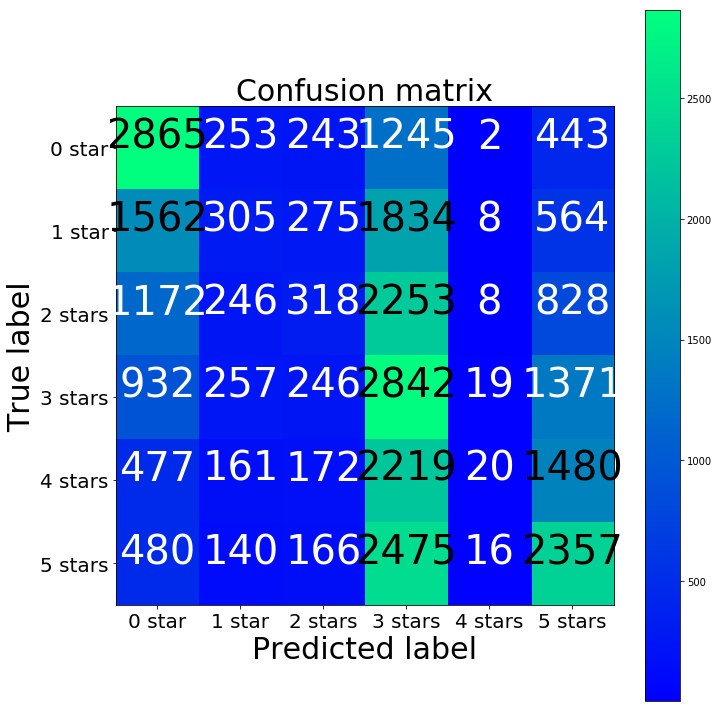

[[2865  253  243 1245    2  443]
 [1562  305  275 1834    8  564]
 [1172  246  318 2253    8  828]
 [ 932  257  246 2842   19 1371]
 [ 477  161  172 2219   20 1480]
 [ 480  140  166 2475   16 2357]]
========== TRAIN ==========
accuracy = 0.288, precision = 0.278, recall = 0.288, f1 = 0.236 



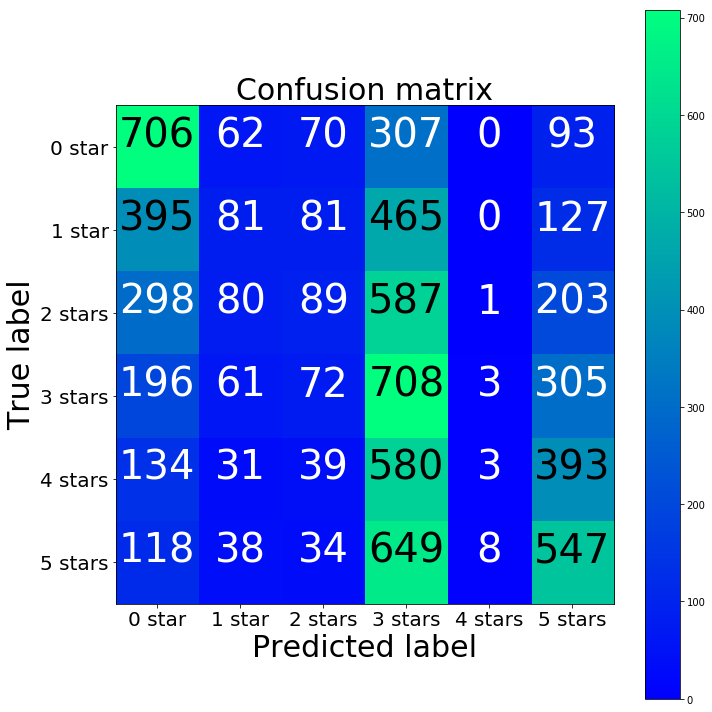

[[706  62  70 307   0  93]
 [395  81  81 465   0 127]
 [298  80  89 587   1 203]
 [196  61  72 708   3 305]
 [134  31  39 580   3 393]
 [118  38  34 649   8 547]]
========== TEST ==========
model = Naive Bayes, accuracy = 0.282, precision = 0.266, recall = 0.282, f1 = 0.230 



(array([3, 5, 1, ..., 0, 3, 3]),
 array([0, 3, 5, ..., 1, 3, 5]),
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))

In [6]:
evaluate_model(model=MultinomialNB(),X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='Naive Bayes')

/home/ftrucco/envs/ml_deeplearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


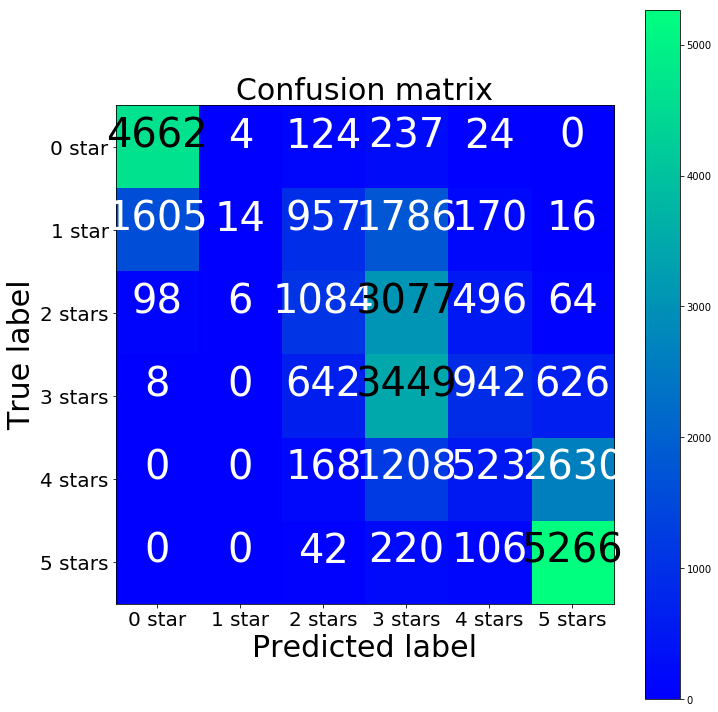

[[4662    4  124  237   24    0]
 [1605   14  957 1786  170   16]
 [  98    6 1084 3077  496   64]
 [   8    0  642 3449  942  626]
 [   0    0  168 1208  523 2630]
 [   0    0   42  220  106 5266]]
========== TRAIN ==========
accuracy = 0.496, precision = 0.481, recall = 0.496, f1 = 0.425 



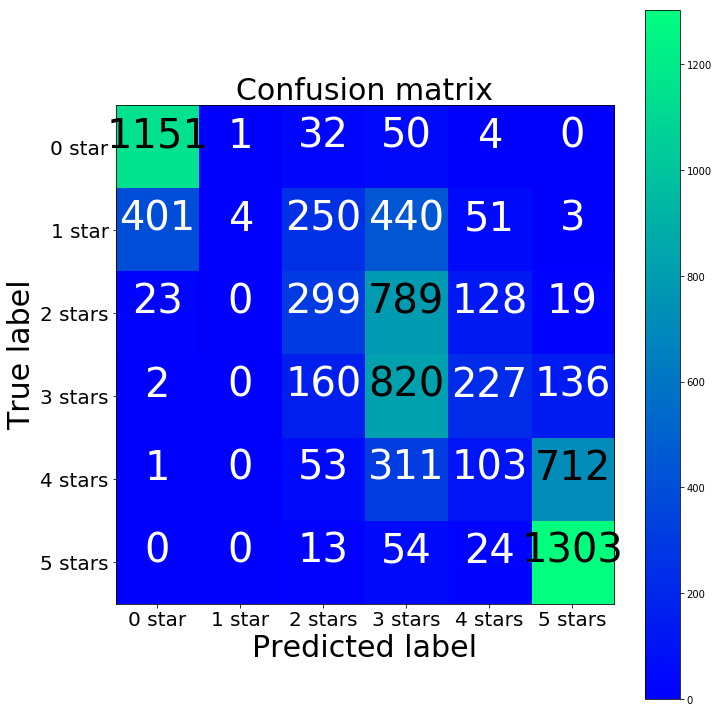

[[1151    1   32   50    4    0]
 [ 401    4  250  440   51    3]
 [  23    0  299  789  128   19]
 [   2    0  160  820  227  136]
 [   1    0   53  311  103  712]
 [   0    0   13   54   24 1303]]
========== TEST ==========
model = SVM, accuracy = 0.487, precision = 0.502, recall = 0.487, f1 = 0.413 



(array([4, 0, 5, ..., 2, 5, 4]),
 array([0, 5, 5, ..., 4, 5, 3]),
 SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False))

In [7]:
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
evaluate_model(model=svm,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='SVM')

In [87]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation, Input, Dropout

y_train = keras.utils.to_categorical(y_train, num_classes=6)
y_test = keras.utils.to_categorical(y_test, num_classes=6)

In [88]:
nn_model = Sequential([   
    Dense(90, input_shape=(len(X_train.columns), )),
    Activation('relu'),
    
    Dropout(0.25),

    Dense(46),
    Activation('relu'),
    
    Dropout(0.5),

    Dense(6),
    Activation('softmax'),
])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

nn_model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

In [90]:
history = nn_model.fit(
    X_train, 
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(
        X_test,
        y_test,
    )
)

Train on 30254 samples, validate on 7564 samples
Epoch 1/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8618 - categorical_accuracy: 0.6416 - val_loss: 0.7803 - val_categorical_accuracy: 0.6787
Epoch 2/100
30254/30254 [==============================] - 1s 29us/step - loss: 0.8606 - categorical_accuracy: 0.6407 - val_loss: 0.7756 - val_categorical_accuracy: 0.6813
Epoch 3/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8584 - categorical_accuracy: 0.6393 - val_loss: 0.8395 - val_categorical_accuracy: 0.6387
Epoch 4/100
30254/30254 [==============================] - 1s 29us/step - loss: 0.8520 - categorical_accuracy: 0.6432 - val_loss: 0.7665 - val_categorical_accuracy: 0.6865
Epoch 5/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8566 - categorical_accuracy: 0.6446 - val_loss: 0.7745 - val_categorical_accuracy: 0.6855
Epoch 6/100
30254/30254 [==============================] - 1s 29us/step - loss: 0.8591 - ca

30254/30254 [==============================] - 1s 28us/step - loss: 0.8217 - categorical_accuracy: 0.6588 - val_loss: 0.7519 - val_categorical_accuracy: 0.6945
Epoch 49/100
30254/30254 [==============================] - 1s 27us/step - loss: 0.8208 - categorical_accuracy: 0.6621 - val_loss: 0.7792 - val_categorical_accuracy: 0.6749
Epoch 50/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8212 - categorical_accuracy: 0.6607 - val_loss: 0.7603 - val_categorical_accuracy: 0.6873
Epoch 51/100
30254/30254 [==============================] - 1s 27us/step - loss: 0.8182 - categorical_accuracy: 0.6605 - val_loss: 0.7630 - val_categorical_accuracy: 0.6861
Epoch 52/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8158 - categorical_accuracy: 0.6646 - val_loss: 0.7446 - val_categorical_accuracy: 0.6982
Epoch 53/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8170 - categorical_accuracy: 0.6635 - val_loss: 0.7550 - val_cate

30254/30254 [==============================] - 1s 28us/step - loss: 0.7952 - categorical_accuracy: 0.6763 - val_loss: 0.7399 - val_categorical_accuracy: 0.7021
Epoch 96/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.7967 - categorical_accuracy: 0.6739 - val_loss: 0.7298 - val_categorical_accuracy: 0.7020
Epoch 97/100
30254/30254 [==============================] - 1s 27us/step - loss: 0.7984 - categorical_accuracy: 0.6734 - val_loss: 0.7375 - val_categorical_accuracy: 0.7049
Epoch 98/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.8008 - categorical_accuracy: 0.6717 - val_loss: 0.7429 - val_categorical_accuracy: 0.6970
Epoch 99/100
30254/30254 [==============================] - 1s 27us/step - loss: 0.7933 - categorical_accuracy: 0.6738 - val_loss: 0.7373 - val_categorical_accuracy: 0.6984
Epoch 100/100
30254/30254 [==============================] - 1s 28us/step - loss: 0.7965 - categorical_accuracy: 0.6748 - val_loss: 0.7233 - val_cat

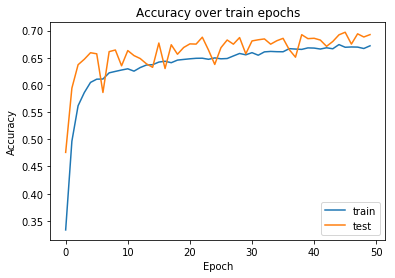

In [73]:

# plot accuracy over training epochs
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

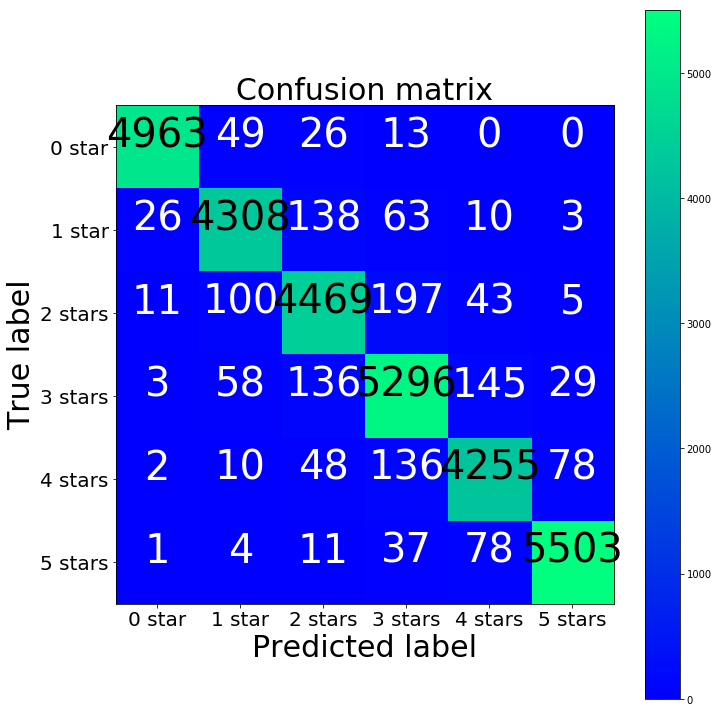

[[4963   49   26   13    0    0]
 [  26 4308  138   63   10    3]
 [  11  100 4469  197   43    5]
 [   3   58  136 5296  145   29]
 [   2   10   48  136 4255   78]
 [   1    4   11   37   78 5503]]
========== TRAIN ==========
accuracy = 0.952, precision = 0.952, recall = 0.952, f1 = 0.952 



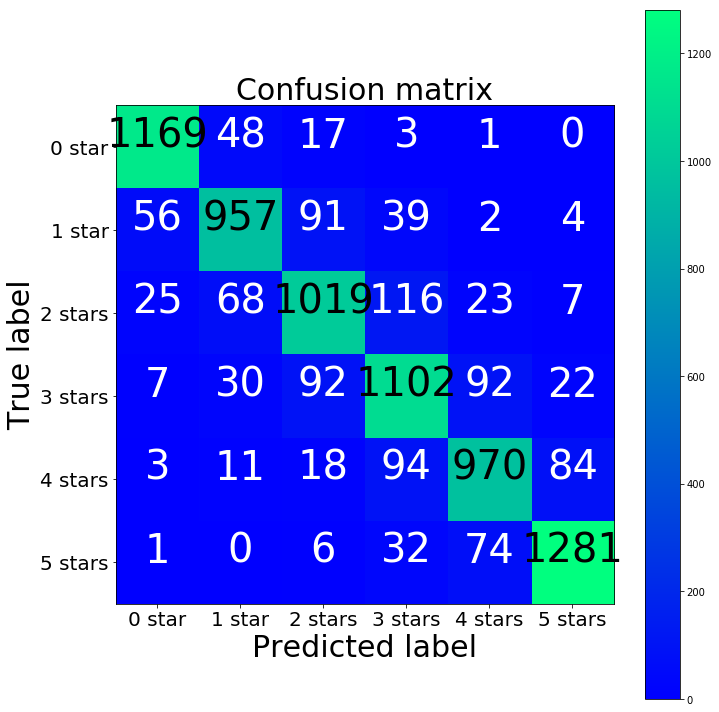

[[1169   48   17    3    1    0]
 [  56  957   91   39    2    4]
 [  25   68 1019  116   23    7]
 [   7   30   92 1102   92   22]
 [   3   11   18   94  970   84]
 [   1    0    6   32   74 1281]]
========== TEST ==========
model = Gradient Boosting, accuracy = 0.859, precision = 0.859, recall = 0.859, f1 = 0.859 



(array([3, 1, 5, ..., 2, 4, 2]),
 array([0, 4, 4, ..., 4, 5, 3]),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.5, loss='deviance', max_depth=5,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=32,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))

In [20]:
gb = GradientBoostingClassifier(n_estimators=32, learning_rate= 0.5, max_depth=5)
evaluate_model(model=gb, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='Gradient Boosting')

This technique is known for working well with classification problems with not much pre processed data. It supports very well having outliers because of it's Decision Trees nature. 
It throws a great result in testing with 85.9% of accuracy.

In [39]:
nn_model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

In [40]:
history = nn_model.fit(
    X_train, 
    y_train,
    epochs=150,
    batch_size=128,
    validation_data=(
        X_test,
        y_test,
    )
)

Train on 30254 samples, validate on 7564 samples
Epoch 1/150
30254/30254 [==============================] - 1s 24us/step - loss: 0.8294 - categorical_accuracy: 0.6501 - val_loss: 0.7847 - val_categorical_accuracy: 0.6731
Epoch 2/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.8360 - categorical_accuracy: 0.6445 - val_loss: 0.7993 - val_categorical_accuracy: 0.6651
Epoch 3/150
30254/30254 [==============================] - 1s 17us/step - loss: 0.8332 - categorical_accuracy: 0.6466 - val_loss: 0.7859 - val_categorical_accuracy: 0.6701
Epoch 4/150
30254/30254 [==============================] - 1s 17us/step - loss: 0.8281 - categorical_accuracy: 0.6492 - val_loss: 0.7759 - val_categorical_accuracy: 0.6828
Epoch 5/150
30254/30254 [==============================] - 1s 17us/step - loss: 0.8366 - categorical_accuracy: 0.6468 - val_loss: 0.8046 - val_categorical_accuracy: 0.6646
Epoch 6/150
30254/30254 [==============================] - 1s 17us/step - loss: 0.8341 - ca

30254/30254 [==============================] - 0s 16us/step - loss: 0.7730 - categorical_accuracy: 0.6798 - val_loss: 0.7597 - val_categorical_accuracy: 0.6839
Epoch 49/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7744 - categorical_accuracy: 0.6750 - val_loss: 0.7321 - val_categorical_accuracy: 0.6976
Epoch 50/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.7726 - categorical_accuracy: 0.6795 - val_loss: 0.7492 - val_categorical_accuracy: 0.6893
Epoch 51/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.7696 - categorical_accuracy: 0.6794 - val_loss: 0.7291 - val_categorical_accuracy: 0.7006
Epoch 52/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7785 - categorical_accuracy: 0.6748 - val_loss: 0.7433 - val_categorical_accuracy: 0.6925
Epoch 53/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7716 - categorical_accuracy: 0.6793 - val_loss: 0.7322 - val_cate

30254/30254 [==============================] - 0s 16us/step - loss: 0.7454 - categorical_accuracy: 0.6918 - val_loss: 0.7229 - val_categorical_accuracy: 0.6979
Epoch 96/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7480 - categorical_accuracy: 0.6881 - val_loss: 0.7094 - val_categorical_accuracy: 0.7134
Epoch 97/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7458 - categorical_accuracy: 0.6886 - val_loss: 0.7256 - val_categorical_accuracy: 0.7000
Epoch 98/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7451 - categorical_accuracy: 0.6901 - val_loss: 0.7187 - val_categorical_accuracy: 0.7011
Epoch 99/150
30254/30254 [==============================] - 1s 17us/step - loss: 0.7478 - categorical_accuracy: 0.6901 - val_loss: 0.7302 - val_categorical_accuracy: 0.6955
Epoch 100/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7430 - categorical_accuracy: 0.6935 - val_loss: 0.7257 - val_cat

30254/30254 [==============================] - 0s 16us/step - loss: 0.7251 - categorical_accuracy: 0.7015 - val_loss: 0.7209 - val_categorical_accuracy: 0.7032
Epoch 143/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.7234 - categorical_accuracy: 0.7019 - val_loss: 0.7002 - val_categorical_accuracy: 0.7097
Epoch 144/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.7199 - categorical_accuracy: 0.7037 - val_loss: 0.7071 - val_categorical_accuracy: 0.7044
Epoch 145/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.7237 - categorical_accuracy: 0.7035 - val_loss: 0.7002 - val_categorical_accuracy: 0.7152
Epoch 146/150
30254/30254 [==============================] - 0s 16us/step - loss: 0.7262 - categorical_accuracy: 0.7015 - val_loss: 0.7072 - val_categorical_accuracy: 0.7054
Epoch 147/150
30254/30254 [==============================] - 0s 15us/step - loss: 0.7250 - categorical_accuracy: 0.7042 - val_loss: 0.7089 - val

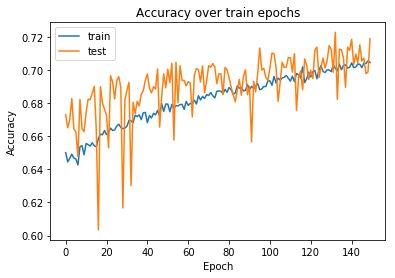

In [49]:

# plot accuracy over training epochs
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()